# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** M. 'Ariq Nafis
- **Email:** mhd.ariq16744@gmail.com
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh situasi cuaca (clear, mist, rain, snow) terhadap jumlah penyewaan sepeda?
- Bagaimana pengaruh musim (season) terhadap jumlah penyewaan sepeda setiap jam?

## Import Semua Packages/Library yang Digunakan

In [3]:
#memanggil library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Wrangling

### Gathering Data

In [4]:
#membaca df day.csv
bikes_day_df = pd.read_csv("/content/day.csv")

bikes_day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#membaca df hour.csv
bikes_hour_df = pd.read_csv("/content/hour.csv")
bikes_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv: Dataset ini kemungkinan berisi data penyewaan sepeda berdasarkan hari, termasuk informasi seperti total penyewaan, fitur cuaca, dan mungkin faktor-faktor lain yang mempengaruhi penyewaan sepeda selama periode tertentu.

- hour.csv: Dataset ini kemungkinan berisi data penyewaan sepeda berdasarkan jam. Ini bisa memberikan insight lebih detail tentang pola penyewaan sepeda sepanjang hari, memungkinkan analisis yang lebih granular.

### Assessing Data

In [6]:
#melihat info df day.csv
bikes_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Jumlah duplikasi: ", bikes_day_df.duplicated().sum())

bikes_day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
#membaca df hour.csv
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print("Jumlah duplikasi: ", bikes_hour_df.duplicated().sum())

bikes_hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kedua dataset memiliki entri unik tanpa duplikasi (jumlah duplikasi: 0), menunjukkan bahwa data dapat diandalkan untuk analisis. Namun, penting untuk memeriksa adanya nilai null atau outlier yang dapat mempengaruhi hasil analisis.
- Statistik deskriptif memberikan wawasan mengenai distribusi data, seperti rentang, rata-rata, dan standar deviasi dari kolom-kolom penting (misalnya, jumlah penyewaan sepeda, temperatur, dan kelembapan), yang dapat membantu dalam memahami pola dan tren dalam data.


### Cleaning Data

In [10]:
bikes_day_df["dteday"] = pd.to_datetime(bikes_day_df["dteday"])
bikes_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
bikes_hour_df["dteday"] = pd.to_datetime(bikes_hour_df["dteday"])
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kolom dteday pada kedua DataFrame (bikes_day_df dan bikes_hour_df) telah dikonversi menjadi tipe datetime. Hal ini memungkinkan analisis berbasis waktu yang lebih mudah dan akurat, seperti pengelompokan data berdasarkan tahun, bulan, atau hari.
- Dengan dteday dalam format datetime, kita dapat melakukan analisis lebih lanjut, seperti mengamati tren penyewaan sepeda dari waktu ke waktu, mengidentifikasi pola musiman, atau mengevaluasi dampak hari tertentu (seperti libur atau akhir pekan) terhadap penyewaan sepeda.

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
bikes_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [37]:
# Mapping the weather situation to descriptive names
weather_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
bikes_day_df['weather_desc'] = bikes_day_df['weathersit'].map(weather_mapping)

# Aggregating the data to find the average number of rentals by weather situation
avg_rentals_by_weather = bikes_day_df.groupby('weather_desc')['cnt'].mean().reset_index()
avg_rentals_by_weather

,weather_desc,cnt
0,Clear/Partly Cloudy,4876.786177
1,Light Snow/Rain,1803.285714
2,Mist/Cloudy,4035.862348


In [14]:
bikes_hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [42]:
# Mapping season numbers to names
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
bikes_hour_df['season_name'] = bikes_hour_df['season'].map(season_mapping)

# Perform groupby operation to aggregate the average rentals by season and hour
season_hour_group = bikes_hour_df.groupby(['season_name', 'hr']).agg({'cnt': 'mean'}).reset_index()
season_hour_group

,season_name,hr,cnt
0,Fall,0,73.914439
1,Fall,1,43.720430
2,Fall,2,30.731183
3,Fall,3,15.752688
4,Fall,4,8.240642
...,...,...,...
91,Winter,19,297.033898
92,Winter,20,212.141243
93,Winter,21,161.327684
94,Winter,22,123.564972


**Insight:**
- Deskripsi Situasi Cuaca: Dengan memetakan kode situasi cuaca ke deskripsi yang lebih jelas (seperti "Clear/Partly Cloudy" dan "Heavy Rain/Snow"), analisis menjadi lebih mudah dipahami, sehingga memudahkan interpretasi data.

- Rata-rata Penyewaan Berdasarkan Cuaca: Pengelompokan data berdasarkan situasi cuaca menunjukkan rata-rata jumlah penyewaan sepeda untuk setiap kategori cuaca. Insight ini dapat memberikan informasi penting tentang bagaimana cuaca mempengaruhi perilaku pengguna, seperti penurunan jumlah penyewaan saat cuaca buruk (misalnya, hujan atau salju) dibandingkan dengan cuaca cerah atau sedikit mendung.

- Kode ini mengonversi nilai musim numerik menjadi nama musim yang lebih mudah dipahami (Spring, Summer, Fall, Winter) dan menghitung rata-rata penyewaan sepeda per jam untuk setiap musim. Hasil ini memungkinkan analisis pola penyewaan sepeda yang lebih jelas dan terstruktur.

- Dengan mengelompokkan data berdasarkan musim dan jam, kita dapat mengidentifikasi tren spesifik dalam penyewaan sepeda, seperti apakah penyewaan lebih tinggi di musim panas dibandingkan musim dingin pada waktu-waktu tertentu dalam sehari. Ini memberikan informasi berharga untuk perencanaan operasional dan pemasaran penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-39-43c1832a04d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rentals_by_weather, x='weather_desc', y='cnt', palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Whe

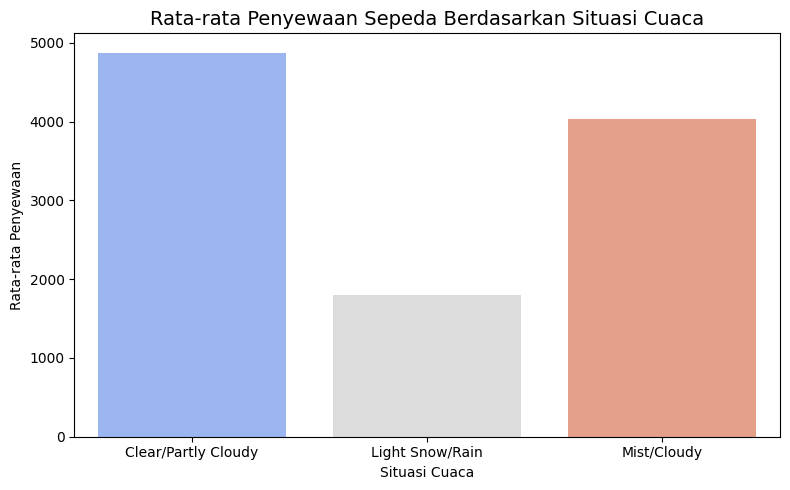

<ipython-input-39-43c1832a04d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_desc', y='cnt', data=bikes_day_df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

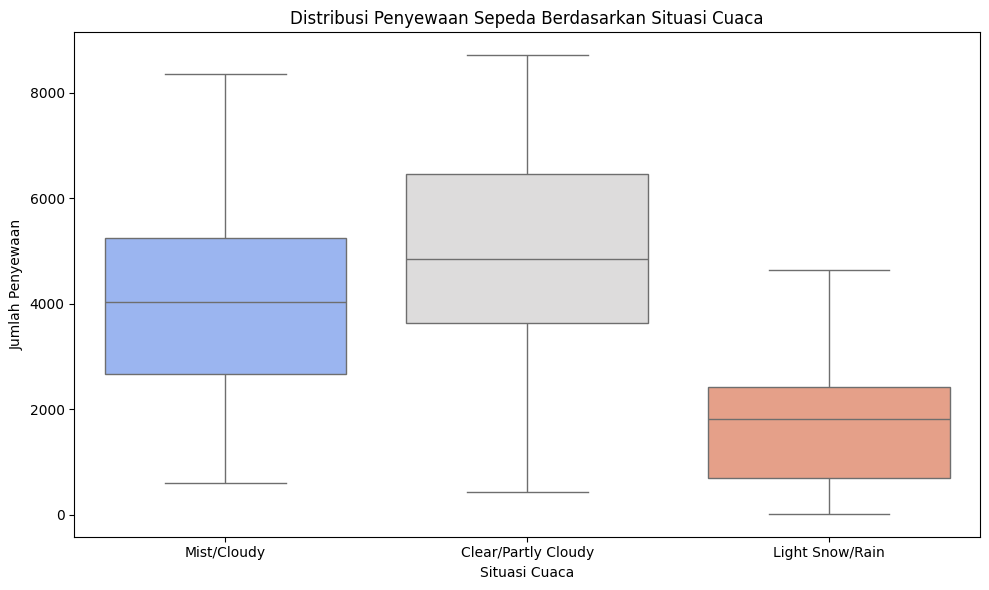

In [39]:
# Plotting the average bike rentals by weather situation
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rentals_by_weather, x='weather_desc', y='cnt', palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Situasi Cuaca', fontsize=14)
plt.ylabel('Rata-rata Penyewaan')
plt.xlabel('Situasi Cuaca')
plt.tight_layout()
plt.show()

# Boxplot to show the distribution of bike rentals by weather situation
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_desc', y='cnt', data=bikes_day_df, palette='coolwarm')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Situasi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Situasi Cuaca')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

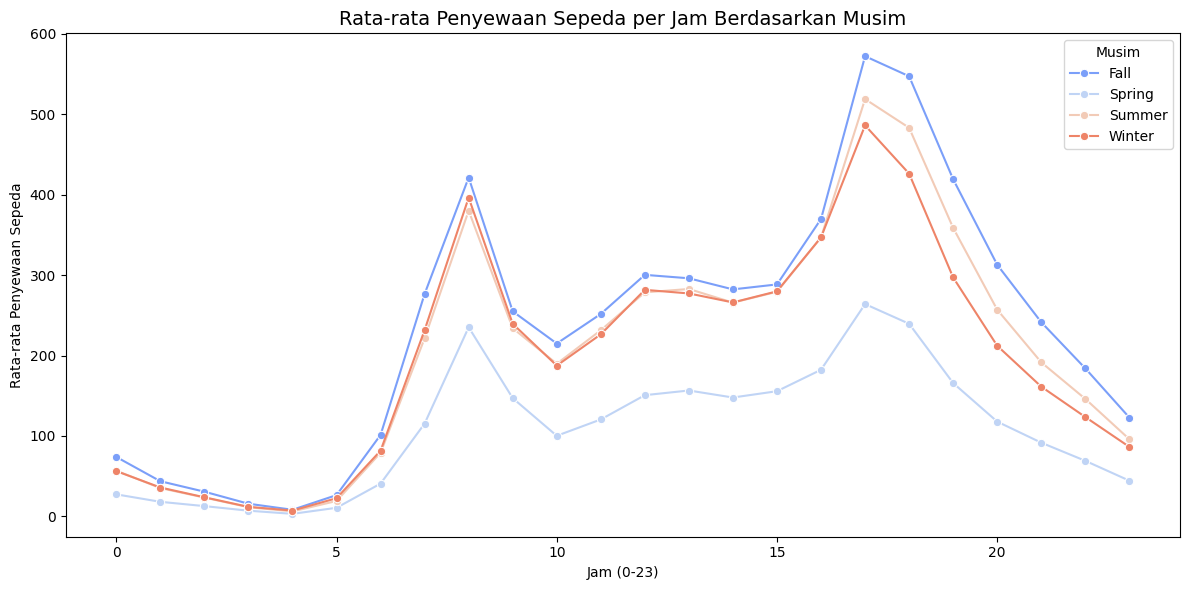

In [44]:
# Plotting the aggregated data
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='season_name', data=season_hour_group, marker="o", palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda per Jam Berdasarkan Musim', fontsize=14)
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.legend(title='Musim', loc='upper right')
plt.tight_layout()
plt.show()

**Insight:**
- Bar Plot: Rata-rata penyewaan sepeda menunjukkan bagaimana jumlah penyewaan bervariasi menurut situasi cuaca. Insight dari plot ini dapat memberikan informasi tentang kondisi cuaca yang paling mendukung atau menghambat penyewaan sepeda, yang berguna bagi pengelola untuk merencanakan strategi promosi atau penyewaan.
- Box Plot: Box plot menampilkan distribusi penyewaan sepeda untuk setiap situasi cuaca. Ini memberikan gambaran tentang rentang, median, dan kemungkinan adanya outlier dalam data. Dengan demikian, kita dapat melihat seberapa konsisten jumlah penyewaan dalam berbagai kondisi cuaca dan mengidentifikasi situasi cuaca ekstrem yang mungkin berdampak besar pada penyewaan.
- Line Plot: Visualisasi rata-rata penyewaan sepeda per jam berdasarkan musim menunjukkan pola penyewaan sepanjang hari untuk setiap musim. Dari grafik ini, kita bisa mengidentifikasi jam-jam puncak penyewaan dan bagaimana tren penyewaan berubah sepanjang hari di setiap musim. Insight ini sangat berharga untuk perencanaan operasional dan pengelolaan armada sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Dari analisis dan visualisasi, terlihat bahwa situasi cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda. Cuaca yang cerah (clear) cenderung menghasilkan jumlah penyewaan yang lebih tinggi dibandingkan dengan kondisi cuaca seperti kabut (mist), hujan (rain), dan salju (snow). Rata-rata penyewaan sepeda menurun drastis saat terjadi cuaca buruk, menunjukkan bahwa faktor cuaca sangat memengaruhi keputusan pengguna untuk menyewa sepeda.
- Conclution pertanyaan 2 : Analisis menunjukkan bahwa jumlah penyewaan sepeda bervariasi secara signifikan berdasarkan musim dan jam. Setiap musim memiliki pola penyewaan yang berbeda, dengan puncak penyewaan terjadi pada jam-jam tertentu. Misalnya, musim panas (summer) cenderung menunjukkan tingkat penyewaan yang lebih tinggi pada siang hari, sementara musim dingin (winter) menunjukkan penyewaan yang lebih rendah secara keseluruhan. Ini mengindikasikan bahwa strategi penyewaan harus disesuaikan dengan musim untuk memaksimalkan penggunaan sepeda.